In [1]:
import numpy as np
import mitsuba as mi
import matplotlib as mpl
import matplotlib.pyplot as plt

# Import or install Sionna
try:
    import sionna.rt
except ImportError as e:
    import os
    os.system("pip install sionna-rt")
    import sionna.rt 
import sionna.rt as rt
from sionna.rt import load_scene, Camera, Transmitter, Receiver, PlanarArray,\
                      PathSolver, RadioMapSolver, load_mesh, watt_to_dbm, transform_mesh,\
                      cpx_abs_square,MeshRadioMap

no_preview = True # Toggle to False to use the preview widget
                  # instead of rendering for scene visualization

In [2]:
scene = load_scene(sionna.rt.scene.san_francisco, merge_shapes=False)

car_materal = rt.ITURadioMaterial("car-material","metal",thickness = 0.01,color = (0.8, 0.1, 0.1))
num_cars = 3
cars = [rt.SceneObject(fname = rt.scene.low_poly_car, name = f"car-{i}", radio_material=car_materal) for i in range(num_cars)]
scene.edit(add=cars)
c = mi.Point3f(468, 106, 0.75)
cars[0].position  = c + mi.Point3f(10, 20, 0)
cars[1].position  = c + mi.Point3f(-10, -20, 0)
cars[2].position  = c + mi.Point3f(10, 10, 0)

cars[0].orientation = [0, 0, 0]
cars[1].orientation = [0, 0, 0]
cars[2].orientation = [0, 0, 0]



In [3]:
# Use a single antenna with isotropic pattern
scene.tx_array = PlanarArray(num_rows=1,
                             num_cols=1,
                             pattern="iso",
                             polarization="V")

# Add a transmitter+
scene.add(Transmitter(name="tx",
                      position=[420, 106, 1],
                      orientation=[0, 0, 0],
                      display_radius=5))

In [4]:
# Clone the terrain mesh
mesurement_surface = scene.objects["Terrain"].clone(as_mesh=True)
# Shift the terrain upwards by 1.5 meters
transform_mesh(mesurement_surface, translation=np.array([0, 0, 1]))

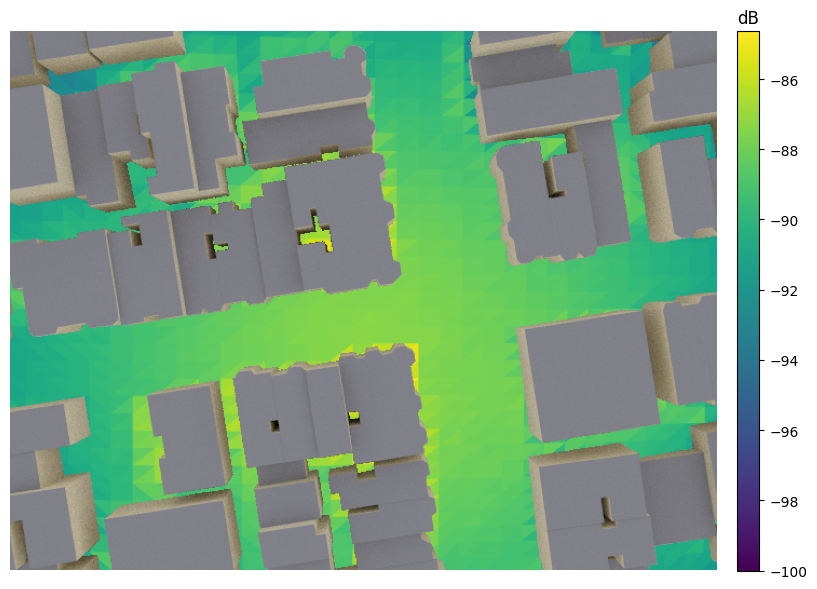

In [6]:
# Compute radio map using the measurement surface
rm_solver = RadioMapSolver()
rm = rm_solver(scene,
               measurement_surface=mesurement_surface,
               refraction=True,
               samples_per_tx=10**8,
               center=[0,0,0.5],
               orientation=[0,0,0],
               size=[186,121],
               max_depth=5,
               cell_size=[2,2])
if no_preview:
    cam = Camera(position=[428, 106, 200],look_at=[428, 106,0])
    scene.render(camera=cam,
                 radio_map=rm,
                 rm_show_color_bar=True,
                rm_vmin=-100);
else:
    scene.preview(radio_map=rm, rm_vmin=-100);